<a href="https://colab.research.google.com/github/Tung0000/Test_model/blob/main/tsest_model_drone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
uploaded = files.upload()  # เรียกใช้ตัวอัพโหลดรูปของ Colab
if not uploaded:
    raise FileNotFoundError("No file uploaded!")
test_image_path = next(iter(uploaded.keys()))  # เก็บชื่อไฟล์เข้าสู่ตัวแปร

Saving drones-over-city-stockcake.jpg to drones-over-city-stockcake.jpg


In [5]:
with open("bestmore.pt", "rb") as f:
    print(f.read(4))


b'PK\x03\x04'


In [7]:
# โหลดโมเดล best
model_path = 'bestmore.pt'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"YOLO model file not found at {model_path}")
model = YOLO(model_path)

In [8]:
# โหลดภาพด้วย OpenCV
image = cv2.imread(test_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {test_image_path}")

# แปลงรูปสีเป็นขาวดำ
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ส่งภาพเข้าโมเดล
results = model(image)


0: 448x800 13 drones, 100.5ms
Speed: 7.2ms preprocess, 100.5ms inference, 556.8ms postprocess per image at shape (1, 3, 448, 800)


In [9]:
for result in results:
    boxes = result.boxes.cpu().numpy()  # แปลงตำแหน่ง Bounding Box ให้อยู่ในรูปแบบ NumPy array
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # ดึงค่าพิกัด Bounding Box (มุมซ้ายบนและมุมขวาล่าง)
        confidence = box.conf[0]  # ดึงค่าความเชื่อมั่นวัตถุ
        cls = int(box.cls[0])  # ดึงค่า class id ของวัตถุที่ตรวจจับได้
        if confidence > 0.5:  # กรองเฉพาะวัตถุที่มีเชื่อมั่นมากกว่า 50%
            label = f"{model.names[cls]} {confidence:.2f}"  # สร้างข้อความแสดงชนิดของวัตถุและค่าความเชื่อมั่น
            # ตีกรอบ (สีแดงและความหนา 3 พิกเซล)
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
            # เขียนข้อความ label
            cv2.putText(image,label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

In [10]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [18]:
from ultralytics import YOLO
import csv
from pathlib import Path

# โหลดโมเดล
model = YOLO("bestmore.pt")

# path ที่จะเซฟผลลัพธ์ CSV
csv_path = "results.csv"

# ถ้ายังไม่มีไฟล์ csv ให้สร้าง header
if not Path(csv_path).exists():
    with open(csv_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["filename", "class", "confidence", "x_min", "y_min", "x_max", "y_max"])

# ทำนายทั้งรูปหรือวิดีโอ
results = model("istockphoto-187347653-612x612.jpg", save=True)   # <-- ใส่ได้ทั้ง jpg, png, mp4, avi, webcam(0)

# loop เก็บผลลัพธ์
for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()   # [x_min, y_min, x_max, y_max]
    confs = r.boxes.conf.cpu().numpy()   # confidence
    classes = r.boxes.cls.cpu().numpy()  # class id

    for box, conf, cls in zip(boxes, confs, classes):
        with open(csv_path, "a", newline="") as f:
            writer = csv.writer(f)
            writer.writerow([
                r.path if hasattr(r, "path") else "video_frame",
                model.names[int(cls)],
                float(conf),
                int(box[0]), int(box[1]), int(box[2]), int(box[3])
            ])



image 1/1 /content/istockphoto-187347653-612x612.jpg: 544x800 6 drones, 48.6ms
Speed: 3.5ms preprocess, 48.6ms inference, 5.3ms postprocess per image at shape (1, 3, 544, 800)
Results saved to /content/runs/detect/predict3


#Number of Drones per Frame → ดูว่าช่วงไหนเจอ drone เยอะ/น้อย

#Confidence Distribution (Histogram) → ดูว่าความมั่นใจของโมเดลโดยรวมอยู่ระดับไหน

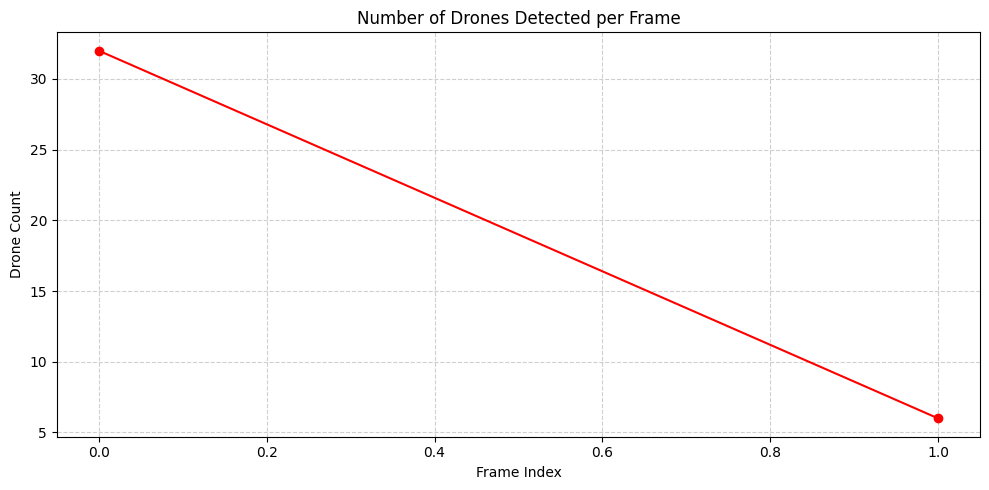

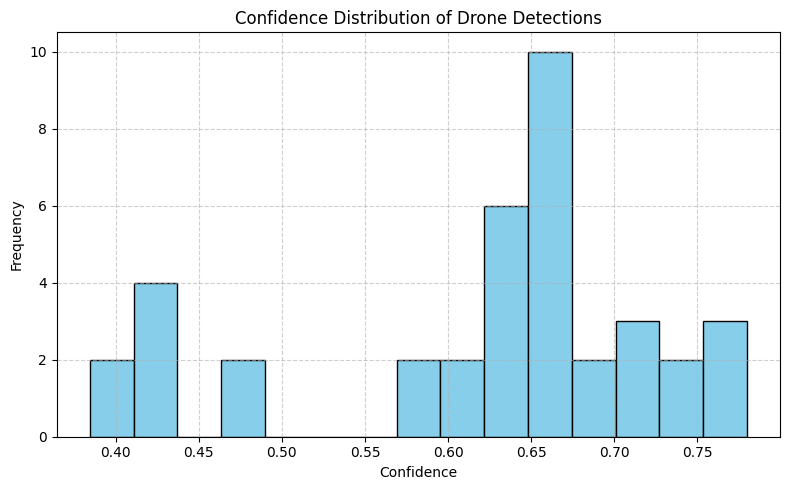

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load detection results
df = pd.read_csv("results.csv")

# --- 1) Number of Drones per Frame ---
counts_per_frame = df.groupby("filename").size().reset_index(name="drone_count")

plt.figure(figsize=(10,5))
plt.plot(counts_per_frame.index, counts_per_frame["drone_count"], marker="o", color="red")
plt.title("Number of Drones Detected per Frame")
plt.xlabel("Frame Index")
plt.ylabel("Drone Count")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- 2) Confidence Distribution (Histogram) ---
plt.figure(figsize=(8,5))
plt.hist(df["confidence"], bins=15, color="skyblue", edgecolor="black")
plt.title("Confidence Distribution of Drone Detections")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
